<a href="https://colab.research.google.com/github/anandbrjcp/PGDSBA/blob/main/Boston_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Exercise Linear Regression

## We will be using the Boston house price dataset for this exercise.
#### This dataset is in-built in Python in the Sci-kit learn library. But for this exercise, we have already downloaded this dataset in the form of a csv file.

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

**Load the dataset**

In [44]:
from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['Boston.csv']))


**Check the data description**

In [45]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()[df.isna().sum()> 0]

Series([], dtype: int64)

In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


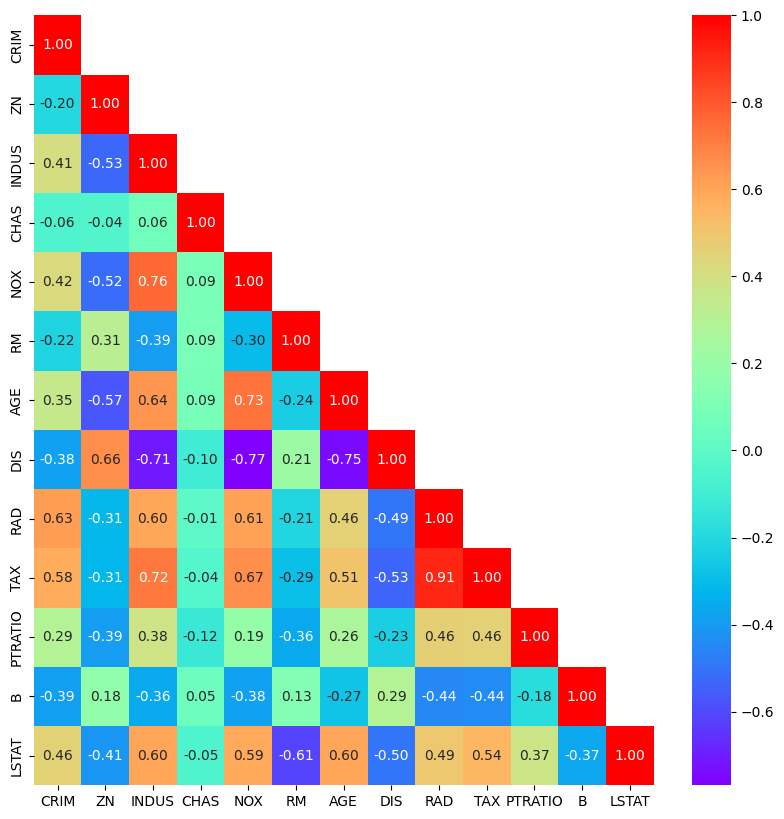

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,0:13].corr(), annot=True, fmt='.2f', cmap='rainbow', mask=np.triu(df.iloc[:,0:13].corr(), +1))
plt.show()

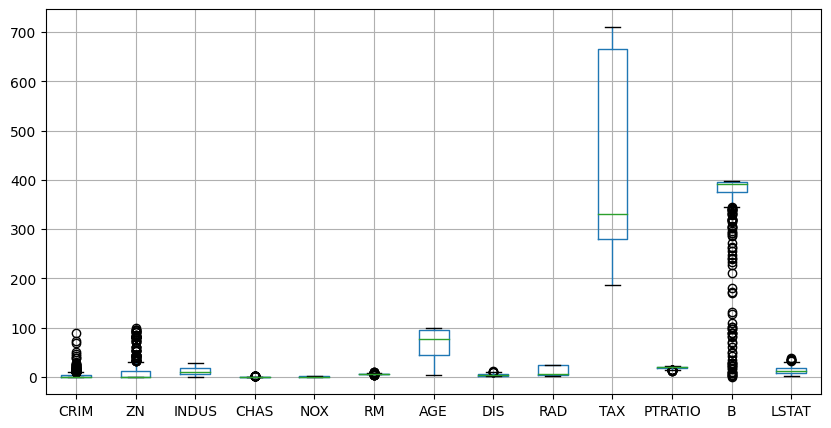

In [47]:
df.iloc[:,0:13].boxplot(figsize = (10,5))
plt.show()

In [31]:
def remove_outliers(col):
  q1, q3 = df[col].quantile([0.25, 0.75])
  iqr = q3 - q1
  lw = q1 - (1.5 * iqr)
  uw = q3 + (1.5 * iqr)
  return lw, uw

In [32]:
for i in df.columns:
  lw, uw = remove_outliers(i)
  df[i] = np.where(df[i] < lw, lw, df[i])
  df[i] = np.where(df[i] > uw, uw, df[i])

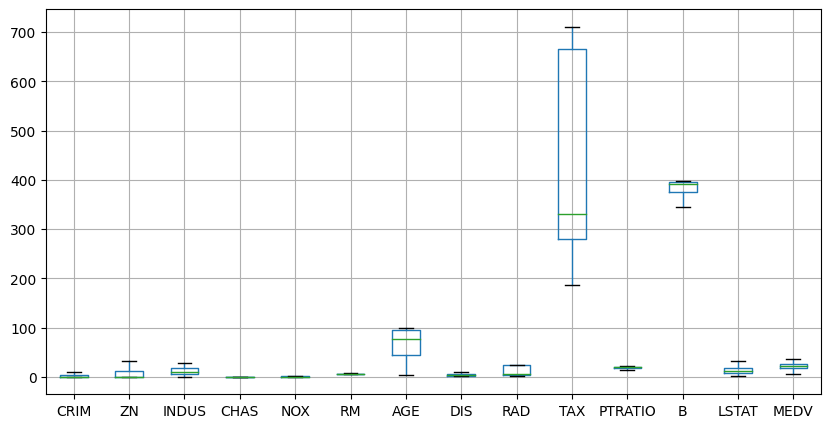

In [33]:
df.boxplot(figsize=(10,5))
plt.show()

In [48]:
X = df.iloc[:, 0:13]
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [49]:
y = df.MEDV
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

In [52]:
X_con = sm.add_constant(X)

In [55]:
X_train, X_test , y_train, y_test = train_test_split(X_con, y, test_size=0.30 , random_state=1)

In [56]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     64.15
Date:                Sat, 25 May 2024   Prob (F-statistic):           3.56e-83
Time:                        08:36:22   Log-Likelihood:                -1061.2
No. Observations:                 354   AIC:                             2150.
Df Residuals:                     340   BIC:                             2205.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3965      6.361      7.294      0.0

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
vif1 = pd.Series([variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])], index = X_train.columns)
print(vif1)

const      585.099960
CRIM         1.993439
ZN           2.743911
INDUS        4.004462
CHAS         1.078490
NOX          4.430555
RM           1.879494
AGE          3.155351
DIS          4.361514
RAD          8.369185
TAX         10.194047
PTRATIO      1.948555
B            1.385213
LSTAT        2.926462
dtype: float64


In [62]:
X_train1 = X_train.drop(columns='TAX')
model1 = sm.OLS(y_train, X_train1).fit()
print(model1.rsquared, model1.rsquared_adj)
print(model1.summary())

0.7059463480895267 0.6955984189900379
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     68.22
Date:                Sat, 25 May 2024   Prob (F-statistic):           5.41e-83
Time:                        08:39:30   Log-Likelihood:                -1063.9
No. Observations:                 354   AIC:                             2154.
Df Residuals:                     341   BIC:                             2204.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

In [63]:
(model.rsquared - model1.rsquared) / model.rsquared

0.006252302337224625

In [65]:
X_train = X_train1
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     68.22
Date:                Sat, 25 May 2024   Prob (F-statistic):           5.41e-83
Time:                        08:41:19   Log-Likelihood:                -1063.9
No. Observations:                 354   AIC:                             2154.
Df Residuals:                     341   BIC:                             2204.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.2371      6.380      7.091      0.0

In [67]:
vif2 = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])], index=X_train.columns)
print(vif2)

const      581.372515
CRIM         1.992236
ZN           2.483521
INDUS        3.277778
CHAS         1.052841
NOX          4.397232
RM           1.876243
AGE          3.154114
DIS          4.339453
RAD          2.978247
PTRATIO      1.914523
B            1.384927
LSTAT        2.924524
dtype: float64


In [ ]:
X_train2 = X_train.drop(columns='NOX')
model2 = sm.OLS(y_train, X_train2).fit()
print(model2.rsquared, model2.rsquared_adj)
print((model.rsquared - model2.rsquared) / model.rsquared)
vif3 = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])], index=X_train.columns)
print(vif3)

In [134]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

class LinearRegressionAnalysis:
    """
    This class performs linear regression analysis and VIF calculation.

    It allows you to:
    - Fit a model with or without specified features.
    - Compare the R-squared of the two models.
    - Calculate and display Variance Inflation Factors (VIFs).
    """

    def __init__(self, X_train, y_train, drop_features=None):
        """
        Initialize the class with training data and optional features to drop.

        Args:
            X_train: DataFrame of predictor variables.
            y_train: Series or array of target variable.
            drop_features (str or list, optional): Feature(s) to drop from the second model. Defaults to None.
        """
        self.X_train = X_train.copy()
        self.y_train = y_train.copy()
        self.drop_features = drop_features
        self.model = None
        self.model2 = None
    def fit_models(self, drop_features=None):
        """
        Fit two models: one with all features and one without the specified features.

        Args:
            drop_features (str or list, optional): Feature(s) to drop. If not provided, uses the value from __init__.
        """
        self.model = sm.OLS(self.y_train, self.X_train).fit()


        if drop_features is None:
            drop_features = self.drop_features
            print(self.model.summary())

        if drop_features is not None:
            self.X_train2 = self.X_train.drop(columns=drop_features)
            self.model2 = sm.OLS(self.y_train, X_train2).fit()



    def compare_r_squared(self):
        """
        Calculate and print the R-squared of both models and their relative difference.
        """
        if self.model is None or self.model2 is None:
            raise ValueError("Models must be fit first using fit_models() method.")

        print(f"Model without DROP: R-squared = {self.model.rsquared:.4f}, Adjusted R-squared = {self.model.rsquared_adj:.4f}")
        print(f"Model with dropped feature: R-squared = {self.model2.rsquared:.4f}, Adjusted R-squared = {self.model2.rsquared_adj:.4f}")
        print(f"Relative R-squared difference: {(self.model.rsquared - self.model2.rsquared) / self.model.rsquared:.4f}")

    def calculate_vif(self, drop_features=None):
        """
        Calculate and display Variance Inflation Factors (VIFs).

        Args:
            df (DataFrame, optional): The dataframe to calculate VIFs for. Defaults to self.X_train.
        """
        if self.model is None:
            raise ValueError("Models must be fit first using fit_models() method.")

        if drop_features is not None:
            df = self.X_train.drop(columns=drop_features)
        else:
          df = self.X_train

        vif = pd.Series([variance_inflation_factor(df.values, i) for i in range(df.shape[1])],
                        index=df.columns)
        print("Variance Inflation Factors (VIFs):")
        print(vif)



In [135]:
analysis = LinearRegressionAnalysis(X_train, y_train)
analysis.fit_models()


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     68.22
Date:                Sat, 25 May 2024   Prob (F-statistic):           5.41e-83
Time:                        09:21:20   Log-Likelihood:                -1063.9
No. Observations:                 354   AIC:                             2154.
Df Residuals:                     341   BIC:                             2204.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.2371      6.380      7.091      0.0

In [136]:
analysis.fit_models(drop_features='NOX')
analysis.compare_r_squared()

Model without DROP: R-squared = 0.7059, Adjusted R-squared = 0.6956
Model with dropped feature: R-squared = 0.6864, Adjusted R-squared = 0.6763
Relative R-squared difference: 0.0277


In [137]:
analysis.calculate_vif()

Variance Inflation Factors (VIFs):
const      581.372515
CRIM         1.992236
ZN           2.483521
INDUS        3.277778
CHAS         1.052841
NOX          4.397232
RM           1.876243
AGE          3.154114
DIS          4.339453
RAD          2.978247
PTRATIO      1.914523
B            1.384927
LSTAT        2.924524
dtype: float64


In [138]:
analysis.calculate_vif(drop_features='NOX')

Variance Inflation Factors (VIFs):
const      394.183277
CRIM         1.973408
ZN           2.483520
INDUS        2.861487
CHAS         1.050703
RM           1.850335
AGE          2.964547
DIS          4.025315
RAD          2.621328
PTRATIO      1.713134
B            1.373782
LSTAT        2.911985
dtype: float64


In [139]:
df_pred = pd.DataFrame()
df_pred['actual_values'] = y_train.values.flatten()
df_pred['fitted_values'] = model.fittedvalues.values
df_pred['residuals'] = model.resid.values
df_pred.head()

,actual_values,fitted_values,residuals
0,20.4,19.491082,0.908918
1,16.0,18.058111,-2.058111
2,13.3,19.408823,-6.108823
3,30.8,31.300727,-0.500727
4,27.5,16.959862,10.540138


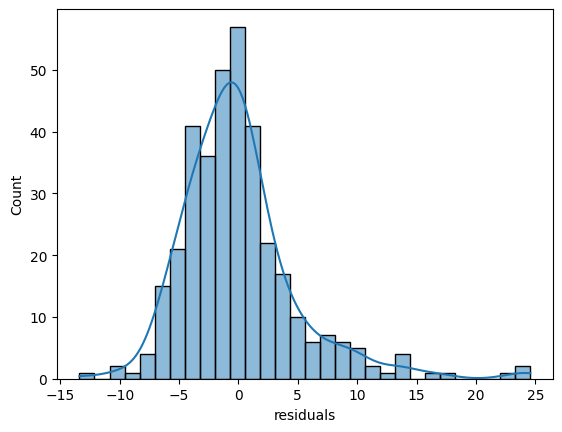

In [141]:
sns.histplot(df_pred.residuals, kde=True)
plt.show()

**Check the shape of the dataset**

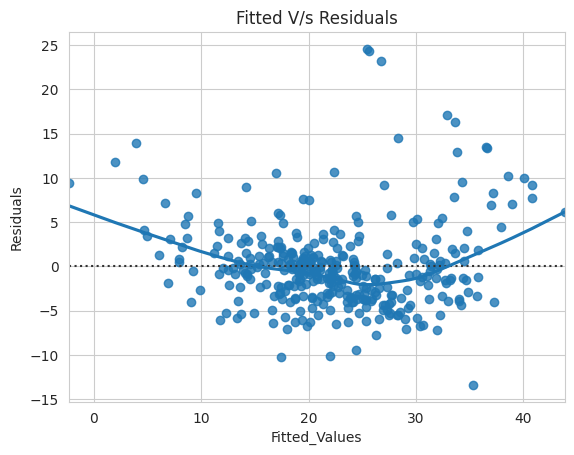

In [142]:
sns.set_style('whitegrid')
sns.residplot(data=df_pred, x = 'fitted_values', y = 'residuals', lowess=True)
plt.ylabel('Residuals')
plt.xlabel('Fitted_Values')
plt.title('Fitted V/s Residuals')
plt.show()

**Get the info data types column wise**

In [146]:
from scipy.stats import shapiro
print(shapiro(df_pred['residuals']))

ShapiroResult(statistic=0.891086220741272, pvalue=3.42104240714982e-15)


In [147]:
import pylab
import scipy.stats as stats


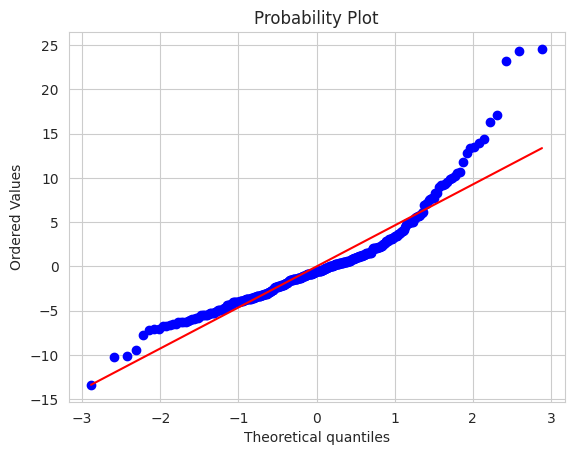

In [149]:
stats.probplot(df_pred.residuals, dist='norm', plot=pylab)
plt.show()

In [144]:
import statsmodels.stats.api as sms


**Get the summary statistics of the dataset**

In [145]:
sms.het_goldfeldquandt(df_pred.residuals, X_train)

(1.2212005548910505, 0.10087938988965765, 'increasing')

**Get the Correlation Heatmap**

**Split the dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

## Using Statsmodels OLS

In [160]:
import statsmodels.api as sm

class RegressionEquationFormatter:
    """
    Formats a linear regression equation from a statsmodels model with custom equation string.

    Attributes:
        model (statsmodels.regression.linear_model.RegressionResultsWrapper): The fitted statsmodels model.
        X_train (pandas.DataFrame): The predictor variables DataFrame used for model fitting.
        equation_str (str): The formatted equation string.
        base_equation (str): The base equation string, including placeholders for variable names.

    Methods:
        format_equation(): Formats the equation string and stores it in equation_str.
    """

    def __init__(self, model, X_train, base_equation="{} = "):
        """
        Initializes the RegressionEquationFormatter object.

        Args:
            model (statsmodels.regression.linear_model.RegressionResultsWrapper): The fitted statsmodels model.
            X_train (pandas.DataFrame): The predictor variables DataFrame used for model fitting.
            base_equation (str, optional): The base equation string, including placeholders for variable names.
                Defaults to "{} = " (e.g., "y = " or "log_price = ").
        """
        self.model = model
        self.X_train = X_train
        self.base_equation = base_equation
        self.equation_str = ""
        self.format_equation()  # Format the equation upon initialization

    def format_equation(self):
        """
        Formats the linear regression equation and stores it in equation_str.
        """
        self.equation_str = self.base_equation.format("log_price")  # Insert dependent variable

        for i, feature in enumerate(self.X_train.columns):
            coeff = self.model.params[i]

            if i == 0:
                # Intercept term
                self.equation_str += f"{coeff:.2f} + "
            else:
                # Other terms with predictor variable names
                self.equation_str += f"{coeff:.2f} * ({feature}) + "

        self.equation_str = self.equation_str[:-3]  # Remove the extra " + " at the end


**Make the linear model using OLS**

In [161]:
# ... (Your code to fit a statsmodels model) ...
model = sm.OLS(y_train, X_train).fit()

# Custom equation string with a placeholder for the dependent variable
custom_equation = "MEDV = {} + "

formatter = RegressionEquationFormatter(model, X_train, base_equation=custom_equation)
print(formatter.equation_str)


MEDV = log_price + 45.24 + -0.10 * (CRIM) + 0.05 * (ZN) + -0.02 * (INDUS) + 2.78 * (CHAS) + -22.40 * (NOX) + 2.85 * (RM) + 0.00 * (AGE) + -1.47 * (DIS) + 0.15 * (RAD) + -1.06 * (PTRATIO) + 0.01 * (B) + -0.57 * (LSTAT)


**Get the value of coefficient of determination**

In [154]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

**Get the Predictions on test set**

**Calculate MSE for training set**

**Get the RMSE on training set**

**Get the RMSE on test set**

## Using Linear Model from Sci-kit learn library

**Fit the model to the training set**

**Get the score on training set**

**Get the score on test set**

**Get the RMSE on test set**

**Check Multi-collinearity using VIF**